# HW5

### NAME: Yuhao Wang
### UNI: yw3204

### Problem 1

1.

The ridge regression optimization problem in this setting is:

$\beta =  argmin_\beta [y_1-(\beta_1x_{11}+\beta_2x_{12})]^2+[y_2-(\beta_1x_{21}+\beta_2x_{22})]^2+\lambda*(\beta_1^2+\beta_2^2)$

$= argmin_\beta [y_1-(\beta_1x_{11}+\beta_2x_{12})]^2+[y_1-(\beta_1x_{11}+\beta_2x_{12})]^2+\lambda*(\beta_1^2+\beta_2^2)$

$= argmin_\beta 2*[y_1-(\beta_1x_{11}+\beta_2x_{12})]^2+\lambda*(\beta_1^2+\beta_2^2)$

$= argmin_\beta 2*[y_1-(\beta_1+\beta_2)x_{11}]^2+\lambda*(\beta_1^2+\beta_2^2)$

2.

Based on question 1, we take derivative w.r.t. $\beta_1$ and $\beta_2$ seperately and set them to 0:

$-4*[y_1-(\beta_1+\beta_2)x_{11}]*x_{11} + 2\lambda*\beta_1 = 0$

$-4*[y_1-(\beta_1+\beta_2)x_{11}]*x_{11} + 2\lambda*\beta_2 = 0$

According to symmetry, it is obvious that $\hat{\beta}_1 = \hat{\beta}_2$.

More accurately, the solution is:

$\hat{\beta}_1 = \hat{\beta}_2 = \frac{2y_1x_{11}}{\lambda+4x_{11}^2}$

3.

Similarly, the lasso optimizaton is:

$\beta = argmin_\beta 2*[y_1-(\beta_1+\beta_2)x_{11}]^2+\lambda*(|\beta_1|+|\beta_2|)$

or 

$\beta = argmin_\beta 2*[y_1-(\beta_1+\beta_2)x_{11}]^2 s.t. |\beta_1|+|\beta_2| \le s$

4.

Notice that the unconstrained problem of the lasso optimization in question 3 is $2*[y_1-(\beta_1+\beta_2)x_{11}]^2$, which reaches the minimum at $\beta_1+\beta_2 = \frac{y_1}{x_{11}}$ and whose contour are two paralleing lines. Then, it is not hard to imagine that the constrained problem reaches the minimum at either $\beta_1+\beta_2 = s$ or $\beta_1+\beta_2 = -s$.

More specifically, the solution is $\{(\beta_1, \beta_2)| \beta_1+\beta_2 = s, 0 \le \beta_1 \le s\}$ when $\frac{y_1}{x_{11}} > s$ and $\{(\beta_1, \beta_2)| \beta_1+\beta_2 = -s, -s \le \beta_1 \le 0\}$ when $\frac{y_1}{x_{11}} < -s$

### Problem 2

<img src="pic2.jpg" width=600>

### Problem 3

Using the majority vote approach, the final claasification will be red while using the average probability the final classification will be green.

### Problem 4

In [57]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

In [59]:
# load data
path1 = "/Users/apple/Desktop/semester_2/4.Stat_ML/hw/hw3/train_3.txt"
path2 = "/Users/apple/Desktop/semester_2/4.Stat_ML/hw/hw3/train_8.txt"

X3=np.loadtxt(path1, delimiter=',')
X8=np.loadtxt(path2, delimiter=',')

y3=np.repeat(-1, len(X3))
y8=np.repeat(1, len(X8))

X=np.concatenate((X3, X8), axis=0)
y=np.concatenate((y3, y8), axis=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [60]:
# 1. AdaBoost Alg.
def adaBoost(X, y, B, train, classify, weighted_err):    
    alpha = []
    allPars = []

    B = 10
    n = len(X)

    w = [1/n]*n

    for i in range(B):
        pars = train(X, w, y)
        epsilon = weighted_err(X, y, pars, w)
        a = np.log(1/epsilon-1)

        for i in range(len(w)):
            if y[i]!=classify(X[i], pars):
                w[i]=w[i]*np.exp(a)

        alpha.append(a)
        allPars.append(pars)
        
    return alpha, allPars

In [72]:
# 2. Decision Stumps
def train(X, w, y):
    pars = [0, 0, 0]
    err = 1

    for m in [-1, 1]:
        for j in range(len(X[0])):
            for theta in np.unique(X[:, j]):
                new_err = weighted_err(X, y, [j, theta, m], w)
                if new_err < err:
                    pars = [j, theta, m]
                    err = new_err
    
    return  pars#j, theta, m


def weighted_err(X, y, pars, w):
    # scale weight
    w_sum = sum(w)
    w = [i/w_sum for i in w]
    
    err = 0
    for i in range(len(X)):
        pred=classify(X[i], pars)
        if y[i] != pred:
            err += w[i]
        else:
            continue
            
    return err
    
    
def classify(x, pars):
    j, theta, m = pars[0], pars[1], pars[2] 
    
    if x[j] > theta:
        return m
    else:
        return -m
    
    
def agg_class(x, alpha, allPars):
    score = 0
    
    for i in range(len(alpha)):        
        score += alpha[i]*classify(x, allPars[i])
    
    if score>0:
        return 1 
    else:
        return -1

In [62]:
# 3. 
alpha, allPars = adaBoost(X_train, y_train, 10, train, classify, weighted_err)

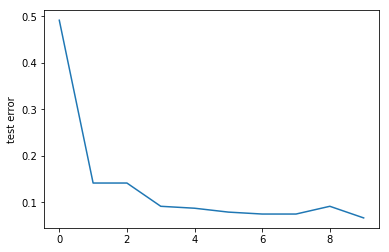

In [82]:
# 4. test error plots
err = []
for b in range(10):
    cnt = 0
    for i in range(len(X_test)):
        if y_test[i] != agg_class(X_test[i], alpha[:b], allPars[:b]):
            cnt += 1
    err.append(cnt/len(y_test))
    
plt.plot(err)
plt.ylabel("test error")
plt.show()